

<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;"><b>Binary Classification with a Bank Churn Dataset V2</b></h2>
    <hr style="border-top: 2px solid #264653;">
    <h3 style="font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri 😊🌟</strong></h3>
    <h2></h2>
</div>

<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻📋 Outline🔻
</p>


* [Introduction](#1)
* [📚 Import Libraries](#2)
* [📖 Lead Dataset](#3)
* [Data Cleaning](#4)
    * [Removing unnecessary columns](#4.1)
    * [Merging two datasets](#4.2)
    * [Missing Values](#4.3)
    * [Duplicates](#4.4)
* [EDA](#5)
    * [Correlation](#5.1)
    * [Feature Engineering](#5.2)
* [🖇🖇📭Data Pipeline](#7)
    * [Creating X and y](#7.1)
    * [Main Pipeline](#7.3)
* [⚙️Finding and Training Models With Best Hyperparameters](#8)
    * [Random Forest Classifier](#8.1)
    * [Cat Boost Classifier](#8.2)
    * [LGBM LIGHT](#8.3)
    * [XGBoost Classifier](#8.4)
* [👀👁Final Model With Voting](#9)
* [📊Generate Predictions and Create Submission File](#10)


In [5]:
%%html
<style>
    .custom-md {
    font-family: 'Georgia', serif; /* Georgia font */
    font-size: 18px;
    line-height: 1.7;
    }
</style>

<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻Introduction🔻</h1>


This notebook aims to analyze customer churn data to identify key factors that contribute to customer attrition.he dataset includes customer information such as demographics, account details, and whether or not they have churned
<h3>    
<center> why do customers churn? </center>
</h3>

some common reasons:

- Poor Customer Service: One of the primary reasons for customer churn is poor customer service. If customers feel they are not receiving prompt, respectful, or helpful service, they are more likely to leave.

- Lack of Customization and Personalization: Customers often seek services that cater to their specific needs. If a financial institution fails to offer personalized and relevant services, customers might find a competitor who does.

- High Fees or Rates: Competitive pricing is key in retaining customers. High fees for services or higher interest rates on products compared to competitors can drive customers away.

- Ease of Account Closure: In the banking sector, if it's easy for customers to close their accounts and switch to another bank, they might be more inclined to churn, especially if they encounter issues with their current bank.
    
#### our dataset containe :

| Column Name      | Description |
|------------------|-------------|
| Surname          | Customer's surname (not typically useful for prediction). |
| CreditScore      | Customer's credit score. |
| Geography        | Customer's country of residence. |
| Gender           | Customer's gender. |
| Age              | Customer's age. |
| Tenure           | Number of years the customer has been with the bank. |
| Balance          | Customer's bank balance. |
| NumOfProducts    | Number of products the customer has with the bank. |
| HasCrCard        | Indicates whether the customer has a credit card (1) or not (0). |
| IsActiveMember   | Indicates whether the customer is an active member (1) or not (0). |
| EstimatedSalary  | Customer's estimated salary. |
| Exited           | Whether the customer has Exited   (1) or not (0) - the target variable. |


<h2 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    ⬇️📚Importing libraries⬇️</h2>

In [6]:
#Basic liberaries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#imputaion for replacing the missing calues with values of our choice like mean median etc..
from sklearn.impute import SimpleImputer

#models
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#for optimization
import optuna

from sklearn.metrics import roc_auc_score,accuracy_score

from sklearn.pipeline import Pipeline

#for data transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

#data spliting
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
#to ignore the marnings
import warnings
warnings.filterwarnings('ignore')

#to display all columns
pd.set_option('display.max_columns',None)
print("setep completed")

setep completed



<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    ⬇️📖Lead Dataset⬇️</h1>

In [7]:
# samp = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")
main = pd.read_csv('../Data/Churn_Modelling.csv')


<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    ⬇️📖Data Cleaning⬇️ </h1>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Removing unnecessary columns⬇️</p>

In [8]:
# first we will drop the two columns id and RowNumber,They are just indexes.
main.drop('RowNumber', inplace = True, axis = 1)
train.drop('id', inplace = True, axis = 1)
test.drop('id', inplace = True, axis = 1)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Merging the two datasets⬇️</p>

In [9]:
#let's view if the columns in the original dataset is the same as our train df

print(f"columns of our df are : \n{list(train.columns)}")
print(f"columns of the original df are : \n{list(main.columns)}")
print(main.shape, train.shape)

columns of our df are : 
['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
columns of the original df are : 
['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
(10002, 13) (165034, 13)


In [10]:
original_train_shape = train.shape[0]
main_shape = main.shape[0]

train = pd.concat([train, main], axis=0)

print(original_train_shape + main_shape)  
print(train.shape) 


175036
(175036, 13)


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Missing Values⬇️</p>

In [11]:
print(train.isnull().sum())
test.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

<div class="custom-md">
this will be solved at data pipeline
 </div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Duplicated Values⬇️</p>

In [12]:
# Remove duplicated rows
print(train.shape)
print(train.duplicated().sum())
train = train.drop_duplicates()
train.shape

(175036, 13)


2


(175034, 13)

<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻Exploring Data Analysis: EDA🔻
</h1>


In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,175034.0,1.569194e+07,71428.904538,15565701.00,15632882.00,15690169.00,1.575666e+07,15815690.00
CreditScore,175034.0,6.561158e+02,81.151171,350.00,597.00,659.00,7.100000e+02,850.00
Age,175033.0,3.817143e+01,8.969537,18.00,32.00,37.00,4.200000e+01,92.00
Tenure,175034.0,5.019922e+00,2.811136,0.00,3.00,5.00,7.000000e+00,10.00
Balance,175034.0,5.667830e+04,62982.565768,0.00,0.00,0.00,1.207293e+05,250898.09
NumOfProducts,175034.0,1.553070e+00,0.549210,1.00,1.00,2.00,2.000000e+00,4.00
HasCrCard,175033.0,7.511841e-01,0.432328,0.00,1.00,1.00,1.000000e+00,1.00
IsActiveMember,175033.0,4.987574e-01,0.500000,0.00,0.00,0.00,1.000000e+00,1.00
EstimatedSalary,175034.0,1.118616e+05,50815.382991,11.58,73192.37,116969.73,1.547673e+05,199992.48
Exited,175034.0,2.111475e-01,0.408124,0.00,0.00,0.00,0.000000e+00,1.00


#### **from the table above we can conclude that this dataset nead to scaling because of the wide range and the hight standard deviation in a lot of feature like `Balance` and `EstimatedSalary` features.**

In [14]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


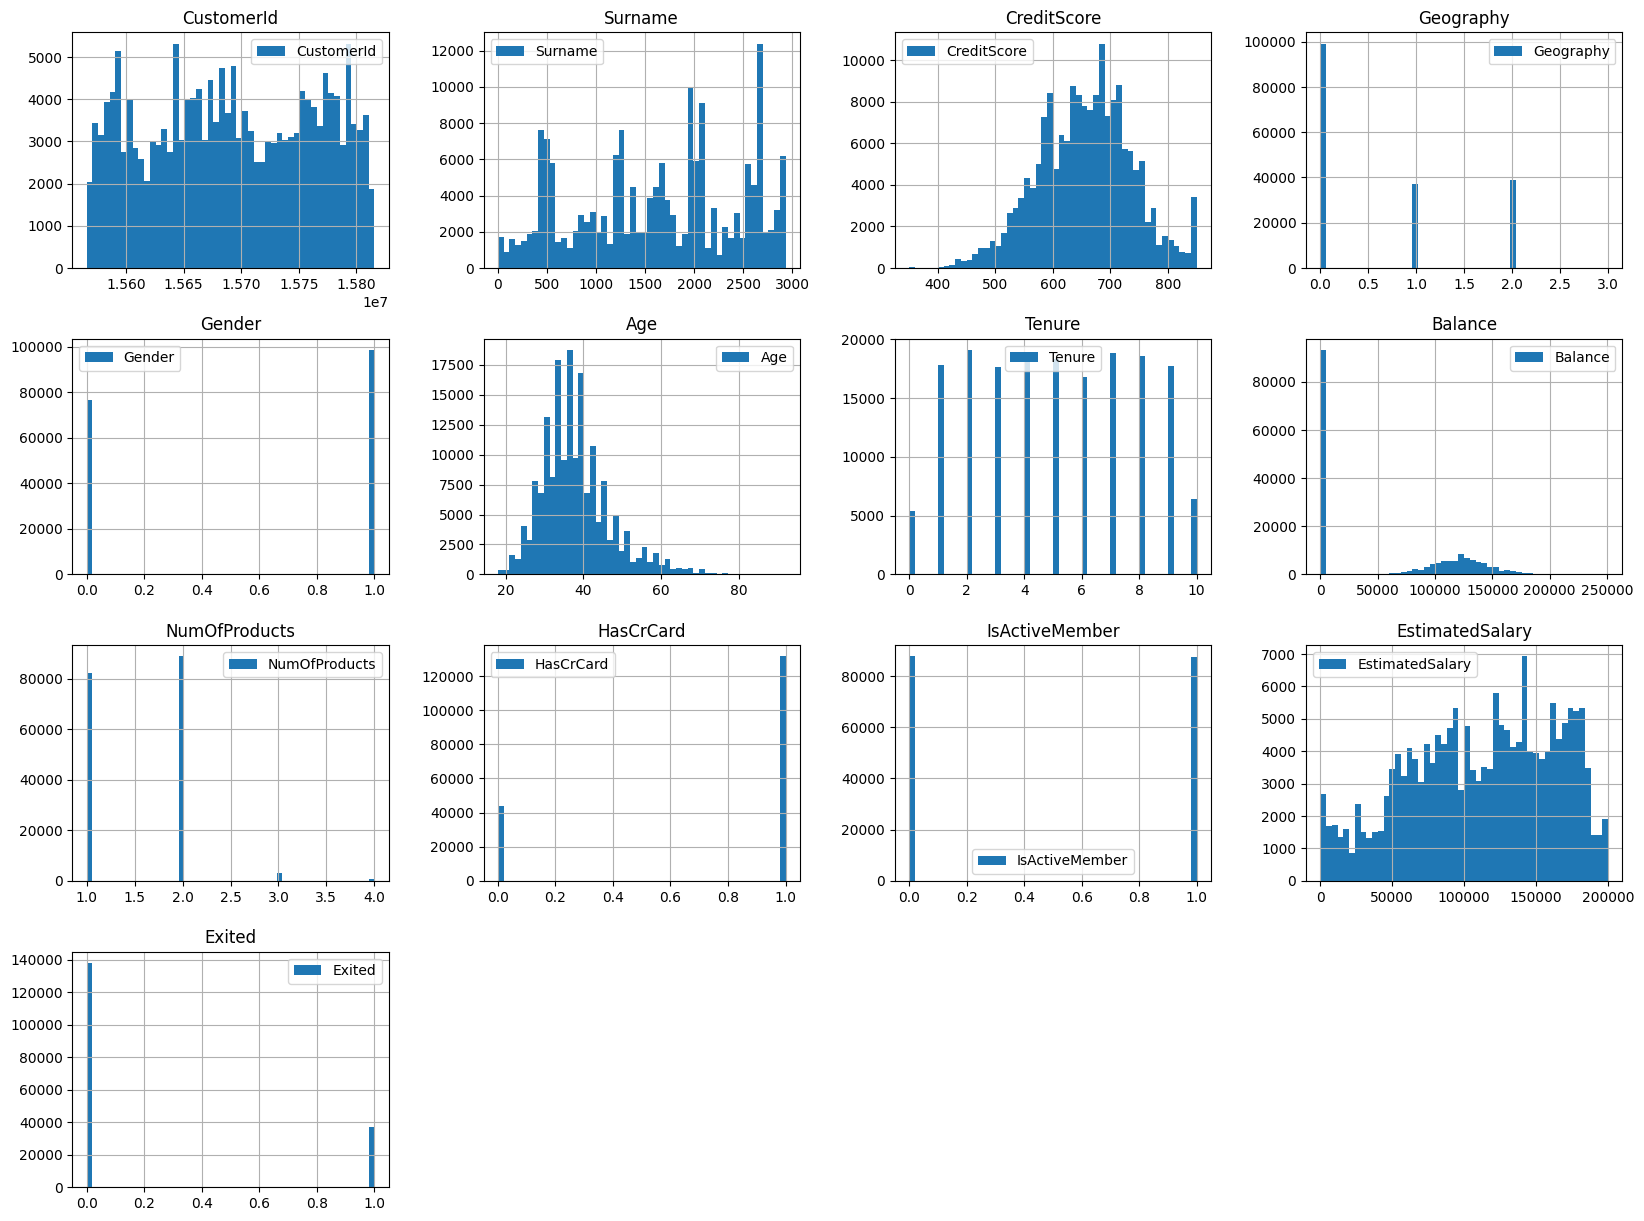

In [15]:
# Plotting every feature on the graph 
# Create a deep copy of train and name it data
data = train.copy()

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Surname'] = label_encoder.fit_transform(data['Surname'])

data.hist(bins=50, figsize=(20,15), legend = True)
plt.show()

In [16]:
data.nunique()

CustomerId         23421
Surname             2932
CreditScore          460
Geography              4
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Correlation⬇️</p>

In [17]:
def corr(data):
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    # Create a heatmap using Seaborn
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    # Set the title of the plot
    plt.title('Correlation Matrix of Features')
    

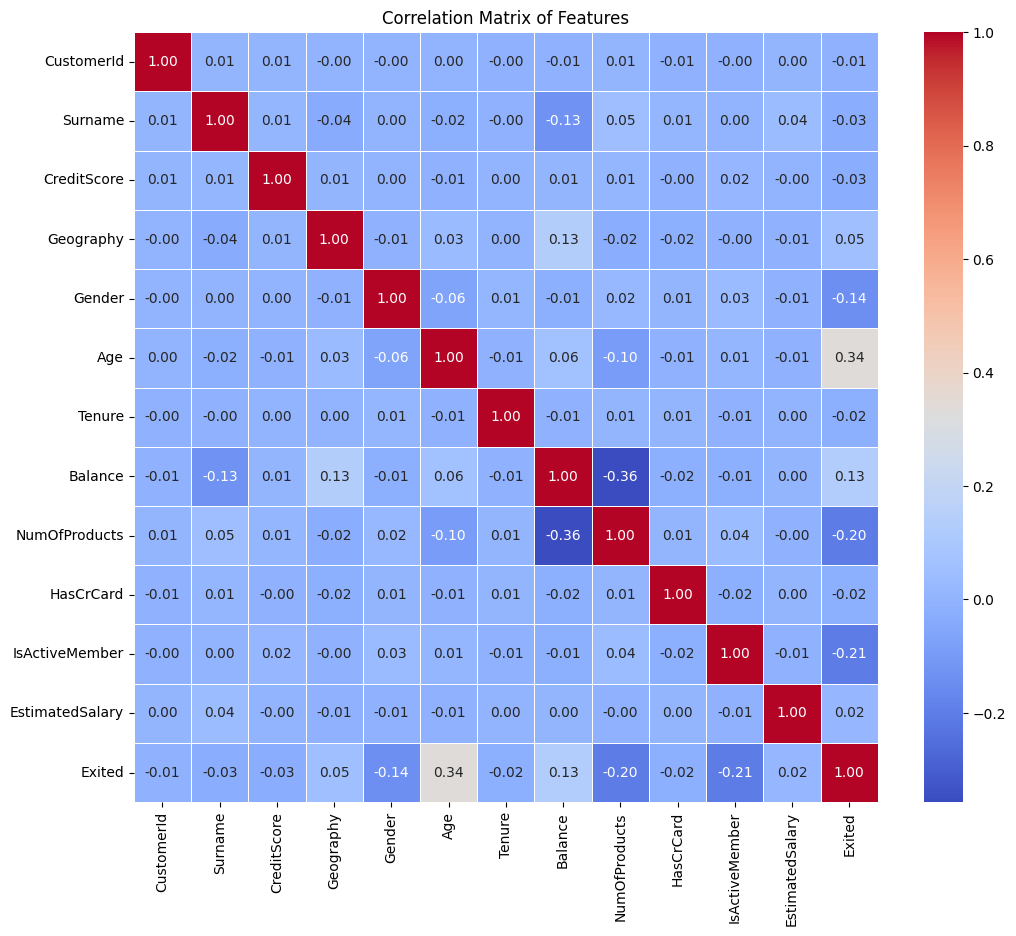

In [18]:
# Calculate the correlation matrix
corr(data.corr())

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px;font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️ Feature Engineering⬇️</p>

In [19]:
def getFeats(df):
    
    df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['Mem__no__Products'] = df['NumOfProducts'] * df['IsActiveMember']
    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    df['Balance_Age_Ratio'] = df['Balance'] / df['Age']
    return df

In [20]:
train['Surname'] = label_encoder.fit_transform(train['Surname'])
test['Surname'] = label_encoder.transform(test['Surname'])

In [21]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,2023,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,2024,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,1236,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,1362,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,491,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [22]:
train = getFeats(train)
test = getFeats(test)

<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻Data Pipeline🔻
</h1>


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Creating X and y⬇️</p>

In [23]:
X = train.drop('Exited', axis=1)
y = train['Exited']

# getting list of the numerical and categorical columns
num = X.select_dtypes(include=['int64', 'float64']).columns
col = X.select_dtypes(include=['object']).columns

# <a id = 7.3>Main Pipeline

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Main Pipeline⬇️</p>

In [24]:
# Preprocessing for numerical data: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, col)])

#preprocessor is the final pipeline, we will using it before the data feds into the ml algo.... using Pipeline

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻⚙️Finding and Training Models With Best Hyperparameters🔻
</h1>



    
| Technology       | Description |
|------------------|-------------|
| Optuna           | Optuna is a hyperparameter optimization framework, compatible with machine learning libraries like TensorFlow, PyTorch, Keras, and SKlearn. It's designed to automatically find the best hyperparameters. |
| Random Forest    | An ensemble method for classification and regression, Random Forest constructs multiple decision trees at training. For classification, it outputs the class selected by most trees; for regression, it returns the average prediction. |
| CatBoost         | Developed by Yandex, CatBoost is an open-source gradient boosting library. It focuses on decision trees for classification and regression tasks, optimizing for speed and accuracy. |
| LightGBM         | Created by Microsoft, LightGBM is a lightweight and efficient gradient-boosting framework. It's designed for distributed and high-performance machine learning tasks. |
| XGBoost          | eXtreme Gradient Boosting (XGBoost) is widely used for supervised learning tasks. Known for handling large datasets effectively, it excels in various classification and regression tasks. |
| Voting Classifier| This model aggregates predictions from multiple machine learning models. It predicts an output class based on the highest probability of chosen class, leveraging the strength of ensemble learning. |
    


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Random forest classifier⬇️</p>

In [26]:

# def objective(trial):
#     # Define the hyperparameters to be optimized
#     n_estimators = trial.suggest_int('n_estimators', 10, 1000, step=5)
#     max_depth = trial.suggest_int('max_depth', 5, 100)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
#     max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
#     bootstrap = trial.suggest_categorical('bootstrap', [True, False])
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
#     # Create a Random Forest model with the specified hyperparameters
#     model = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         bootstrap=bootstrap,
#         criterion=criterion,
#         random_state=42
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
#     # Train the model
#     pipeline.fit(X_train, y_train)
    
#     # Make predictions on the test set
#     predictions = pipeline.predict_proba(X_test)[:, 1]
    
#     # Calculate AUC-ROC as the metric to optimize
#     auc_roc = roc_auc_score(y_test, predictions)
    
#     return auc_roc

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # Get the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)


In [ ]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = RandomForestClassifier(**{'n_estimators': 425, 'max_depth': 13, 'min_samples_split': 41, 'min_samples_leaf': 2, 
                                      'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy', 'random_state': 42})

Ran_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    
Ran_best.fit(X_train, y_train)

predictions = Ran_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Cat Boost Classifier⬇️</p>

In [24]:
# def objective(trial):
#     iterations = trial.suggest_int('iterations', 50, 100, step=10)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
#     depth = trial.suggest_int('depth', 3, 15)
#     l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-3, 1)

#     model = CatBoostClassifier(
#         iterations=iterations,
#         learning_rate=learning_rate,
#         depth=depth,
#         l2_leaf_reg=l2_leaf_reg,
#         random_state=42,
#         verbose=0  # Set verbose to 0 to suppress CatBoost output
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
#     pipeline.fit(X_train, y_train)
#     probabilities = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
#     auc_roc = roc_auc_score(y_test, probabilities)
    
#     return auc_roc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# best_params = study.best_params
# print("Best Hyperparameters (CatBoost):", best_params)

In [25]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = CatBoostClassifier(**{'iterations': 830, 'learning_rate': 0.08238714339235984, 'depth': 5,
                                 'l2_leaf_reg': 0.8106903985997884, 'random_state': 42, 'verbose': 0})

Cat_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])

Cat_best.fit(X_train, y_train)

predictions = Cat_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc

0.891295569141522

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️LGBM LIGHT⬇️</p>

In [26]:
# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=10)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     min_child_samples = trial.suggest_int('min_child_samples', 1, 20)
#     subsample = trial.suggest_float('subsample', 0.5, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

#     model = LGBMClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         min_child_samples=min_child_samples,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         random_state=42
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
#     pipeline.fit(X_train, y_train)
#     probabilities = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
#     auc_roc = roc_auc_score(y_test, probabilities)
    
#     return auc_roc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# best_params = study.best_params
# print("Best Hyperparameters (LightGBM):", best_params)

In [27]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = LGBMClassifier(**{'n_estimators': 960, 'learning_rate': 0.031725771326186744, 'max_depth': 8, 'min_child_samples': 8, 
                               'subsample': 0.7458307885861184, 'colsample_bytree': 0.5111460378911089, 'random_state': 42})

LGBM_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    
LGBM_best.fit(X_train, y_train)

predictions = LGBM_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc

0.8916788985314651

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️XGBoost Classifier⬇️</p>

In [28]:
# Don't uncomment to run it this will take more time than you can think and Kaggle allows , above 12 hours

# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=10)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
#     gamma = trial.suggest_loguniform('gamma', 1e-3, 1)

#     model = XGBClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         min_child_weight=min_child_weight,
#         gamma=gamma,
#         random_state=42
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
#     pipeline.fit(X_train, y_train)
#     predictions = pipeline.predict_proba(X_test)[:, 1]
    
#     auc_roc = roc_auc_score(y_test, predictions)
    
#     return auc_roc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# best_params = study.best_params
# print("Best Hyperparameters (XGBoost):", best_params)

In [29]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = XGBClassifier(**{'n_estimators': 810, 'learning_rate': 0.07921079869615913, 'max_depth': 5,
                            'min_child_weight': 8, 'gamma': 0.27423983829634263, 'random_state': 42, 'objective': 'binary:logistic',
                            'eval_metric': 'auc', 'n_jobs': -1})

XGB_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    
XGB_best.fit(X_train, y_train)

predictions = XGB_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc

0.8908003079522036

<h1 style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻👀👁Final Model With Voting🔻
</h1>


In [ ]:
# # Create a VotingClassifier with the three XGBoost models
voting = VotingClassifier(estimators=[
    ('Model1', LGBM_best),
    ('Model2', XGB_best),
    ('Model3', Cat_best)
], voting='soft', weights = [0.5, 0.3, 0.2])

voting.fit(X_train, y_train)

predictions = voting.predict_proba(X_test)[:, 1]
predict = voting.predict(X_test)

auc_roc = roc_auc_score(y_test, predictions)
acuu = accuracy_score(y_test, predict) 
auc_roc, acuu

NameError: name 'VotingClassifier' is not defined

# <center> <a id = 10>📊Generate Predictions and Create Submission File

In [31]:
voting.fit(X, y)

# Making predictions on the test set
pred = voting.predict_proba(test)[:, 1]

samp['Exited'] = pred

samp.to_csv('sample_submission.csv', index = False)

samp.head()

,id,Exited
0,165034,0.032602
1,165035,0.843081
2,165036,0.020614
3,165037,0.236477
4,165038,0.381631
